# Figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
result_data = pd.read_csv("Result_Data.csv", sep = ";", index_col=None)
result_data

,Scale,Number of Rates,Features,Number of Cases,Mean Quality Metric
0,BVE,9,Geomorph,10,0.020906
1,BVE,9,Geomorph,15,0.019439
2,BVE,9,Geomorph,20,0.019926
3,BVE,9,Saturation,10,0.008274
4,BVE,9,Saturation,15,0.007830
5,BVE,9,Saturation,20,0.008679


In [38]:
res_bve = result_data.loc[(result_data["Scale"]=="BVE") & (result_data["Number of Rates"]==9)]
res_bve

,Number of Cases,Scale,Number of Rates,Features,Mean of Quality Metric
0,25,BVE,9,Saturation,0.00876
1,25,BVE,9,Geomorph,0.02066
2,25,BVE,9,Geomorph + Vulnerability,0.01616
3,25,BVE,9,Geomorph + Vulnerability + Saturation,0.02032
8,10,BVE,9,Geomorph,0.00630
9,11,BVE,9,Geomorph,0.00650
10,10,BVE,9,Geomorph + Vulnerability,0.00700
11,15,BVE,9,Geomorph + Vulnerability,0.00950
12,18,BVE,9,Geomorph + Vulnerability,0.01290
13,20,BVE,9,Geomorph + Vulnerability,0.01370


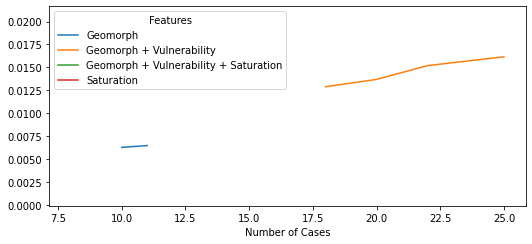

In [40]:
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
res_bve = result_data.loc[(result_data["Scale"]=="BVE") & (result_data["Number of Rates"]==9)]
res_bve = res_bve.pivot(index='Number of Cases', columns='Features', values='Mean of Quality Metric')
res_bve.plot()
plt.show()

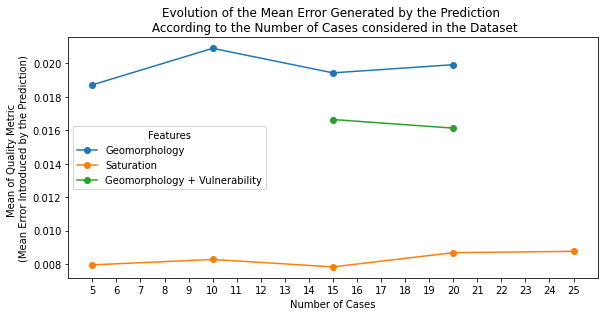

In [83]:
def generate_figure_evolution_quality_according_number_cases():
    # Data
    result_data = pd.read_csv("Result_Data.csv", sep = ";", index_col=None)
    res_bve = result_data.loc[(result_data["Scale"]=="BVE") & (result_data["Number of Rates"]==9)]
    #Plot
    plt.rcParams["figure.figsize"] = [8.50, 4.50]
    plt.rcParams["figure.autolayout"] = True
    for feature in res_bve.Features.unique():
        res = res_bve.loc[res_bve["Features"]==feature]
        res = res.sort_values("Number of Cases")
    #print(res)
        plt.plot(res['Number of Cases'], res["Mean of Quality Metric"], label=feature, marker="o")

    # Add title and axis names
    plt.title('Evolution of the Mean Error Generated by the Prediction \n According to the Number of Cases considered in the Dataset')
    plt.xlabel('Number of Cases')
    plt.ylabel('Mean of Quality Metric \n(Mean Error Introduced by the Prediction)')
    plt.xticks(range(5,26),range(5,26))
    plt.legend(title="Features")
    #plt.show()
    plt.savefig("Evolution_Quality_Number_Cases.pdf")
    return plt

plt = generate_figure_evolution_quality_according_number_cases()
#plt